In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#gold_dir = os.environ['HOME'] + '/data/{}/randoms/'.format(version)
#randoms_dir = os.environ['HOME'] + '/data/{}/randoms/'.format(version)
#gold_dir
#randoms_dir

'/cosma/home/durham/dc-moor2/data/v1/randoms/'

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [3]:
import pubplot

from   vmaxer        import vmaxer
from   astropy.table import Table
from   smith_kcorr   import test_plots, test_nonnative_plots
from   cosmo         import distmod
from   findfile      import findfile

In [28]:
dryrun  = False
version = 'latest'
survey  = 'gama'

##  kE Catalog

In [29]:
fpath = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
gama_kE = Table.read(fpath)
gama_kE

<Table length=113687>
 CATAID       OBJID             RA          DEC      R_PETRO   ZGAMA    NQ  ...   Z_THETA_QCOLOR       DDPKCORR_R0P1         DDPKCORR_G0P1        DDPKCORR_R0P0       DDPKCORR_G0P0        DDPMALL_0P0    
                               deg          deg        mag                  ...                                                                                                                mag        
 int32        int64          float64      float64    float32  float32 int16 ...      float64              float64               float64              float64             float64             float64      
------- ------------------ ------------ ----------- --------- ------- ----- ... ------------------ --------------------- --------------------- ------------------- ------------------- -------------------
  55383 587722982814646452   181.871878 -0.27042178 18.602032 0.04729     4 ...  35.79562409609961   -0.1526593314431797  -0.20228000393021722 0.06406554691902142 0.06289528578344605 -17.254844647875426
  40488 587722982277644333 181.63329028 -0.64674069 18.588371 0.20122     4 ...  39.26487581558775 -0.044445330699246194    0.1481913458102212 0.17227954766295492  0.4133666355238845 -20.601542206158303
 600969 588848900431216877 138.08615023    0.302724 18.366667 0.05365     4 ...  36.07834106868316   -0.1456432389995999   -0.1918619172169734  0.0710816393626012 0.07331337249668987  -17.77551792591144
  40000 587722982276595845 179.20251064 -0.81642342 17.850286 0.14181     4 ... 38.199899730609275  -0.07560764941954926 -0.007495728637855054 0.14111722894265186 0.25767956107580825 -20.523162399244175
 341925 587726032800186513 213.69378727  2.39489753 17.448318 0.16915     5 ...  38.86252662904792  -0.06056670512207177   0.06187180379599769 0.15615817324012934   0.327047093509661 -21.335524372671827
 493576 587729778521145698  221.5604937 -1.35761529 19.367214 0.13248     4 ...  38.27593253857853  -0.08121712871356893  -0.03006698805141142  0.1355077496486322 0.23510830166225186  -18.84824230913197
 618990 588848900466016531 217.64901823  0.36921654 18.194399 0.17376     4 ... 38.661741693237644  -0.05818257818281324    0.0739885412927545 0.15854230017938786  0.3391638310064178 -20.652192634862242
 261498 587726015620972825 214.75407116  2.48491909 18.809385 0.05675     4 ... 36.197514565595846  -0.14234377498544637  -0.18662581780162252 0.07438110337675474 0.07854947191204076 -17.460137757894078
3908837 588010931371049209 136.90310331 -1.19041334 15.733421 0.05348     4 ... 36.073570680704925  -0.14582642298643916  -0.19214608390127802 0.07089845537576195 0.07302920581238526 -20.401575104468463
 240047 587726014549721290 220.35218699  1.46484755 17.490616 0.13002     5 ...  38.21952425700366  -0.08274665397632464  -0.03591516260741637 0.13397822438587648  0.2292601271062469 -20.681369165792205
 418075 587728879258108504 134.88866626  2.53302916  19.11889 0.19524     4 ...  39.21174287174608  -0.04739710141585926    0.1317683411406273 0.16932777694634185  0.3969436308542906 -20.000282090289044
   6905 588848900984143970 174.78362105  0.71859973 19.353302 0.25986     4 ...  39.28166358868146  -0.01406182299859951    0.3137255695363385  0.2026630553636016  0.5789008592500018 -20.441475021860022
 166263 587725040094412950 185.71609226 -2.72361217 18.311945 0.19614     4 ... 39.257688626281656 -0.046952281516290134   0.13423164006860488 0.16977259684591098 0.39940692978226816 -20.818006328241317
 204647 587725074455069087 138.94974368  -0.2746688 19.621572 0.24412     4 ...  39.79885509273825  -0.02272990057990744   0.26883962793775623  0.1939949777822937  0.5340149176514195 -20.024272007502486
 145242 587724650869227534 183.55298722 -1.26348704 16.804522 0.07016     5 ...  36.67159607583548  -0.12892832042900243    -0.162815269557668 0.08779655793319868 0.10236002015599527  -19.94769239523608
  14987 588848901001118029 213.66027069  0.66816768 18.922514 0.17659     4 ...  38.60519773627909 -0.056734448220821944 

In [40]:
def color_plot(ctype, xlabel=None, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(gama_kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    if xlabel == None:
        xlabel = ctype
    
    for count, jj in enumerate(np.unique(idx)):
        sample  = gama_kE[(idx == jj) & (gama_kE['MCOLOR_0P0'].data >= -23.) & (gama_kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.05
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample, lw=2, color=colors[count], label=r'{:.0f} $\leq M_r \leq$ {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)

    plt.xlabel(xlabel)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    
    plt.xlim(-0.1, max_col)
    
    plt.legend(frameon=False)

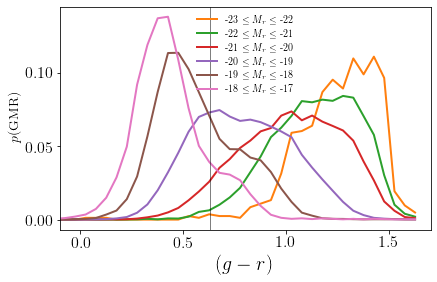

In [41]:
color_plot('GMR', '$(g-r)$', max_col=1.7)

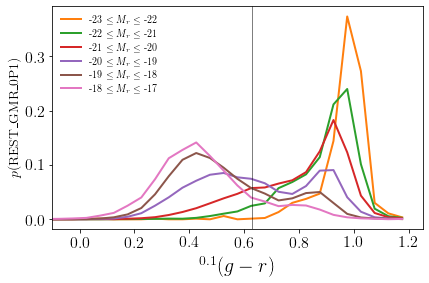

In [44]:
color_plot('REST_GMR_0P1', '$^{0.1}(g-r)$', max_col=1.25)

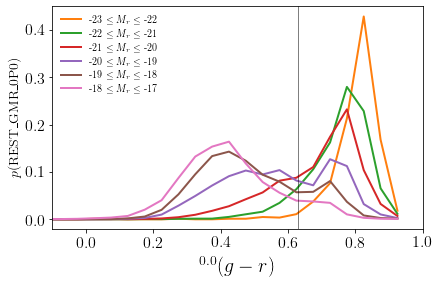

In [45]:
color_plot('REST_GMR_0P0', '$^{0.0}(g-r)$')

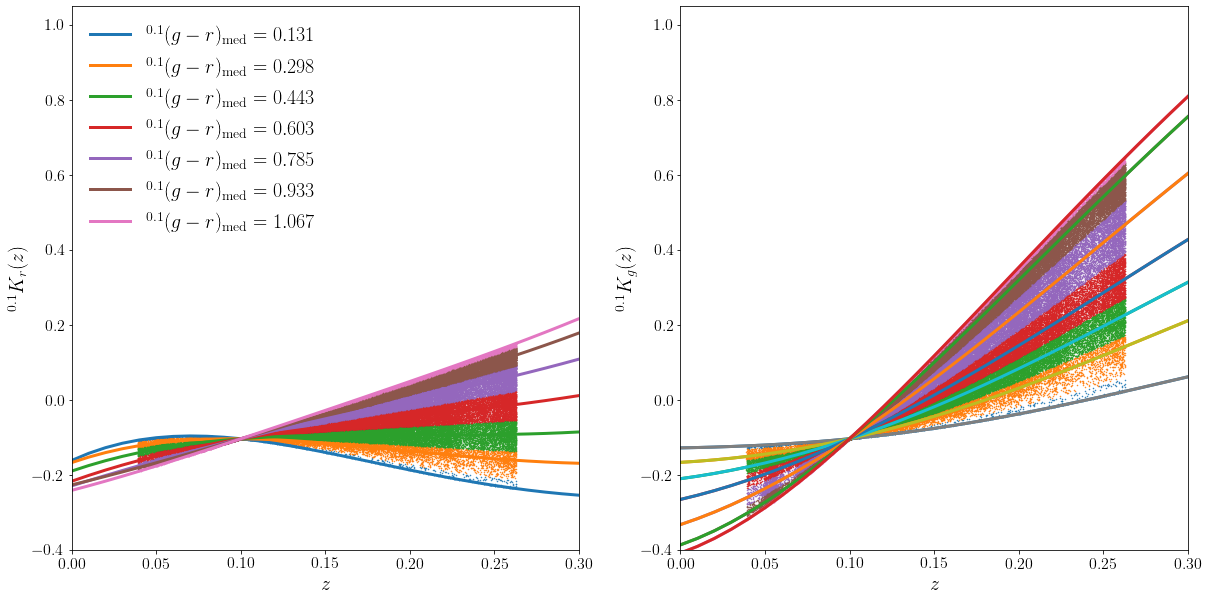

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)
axes[1].get_legend().remove()

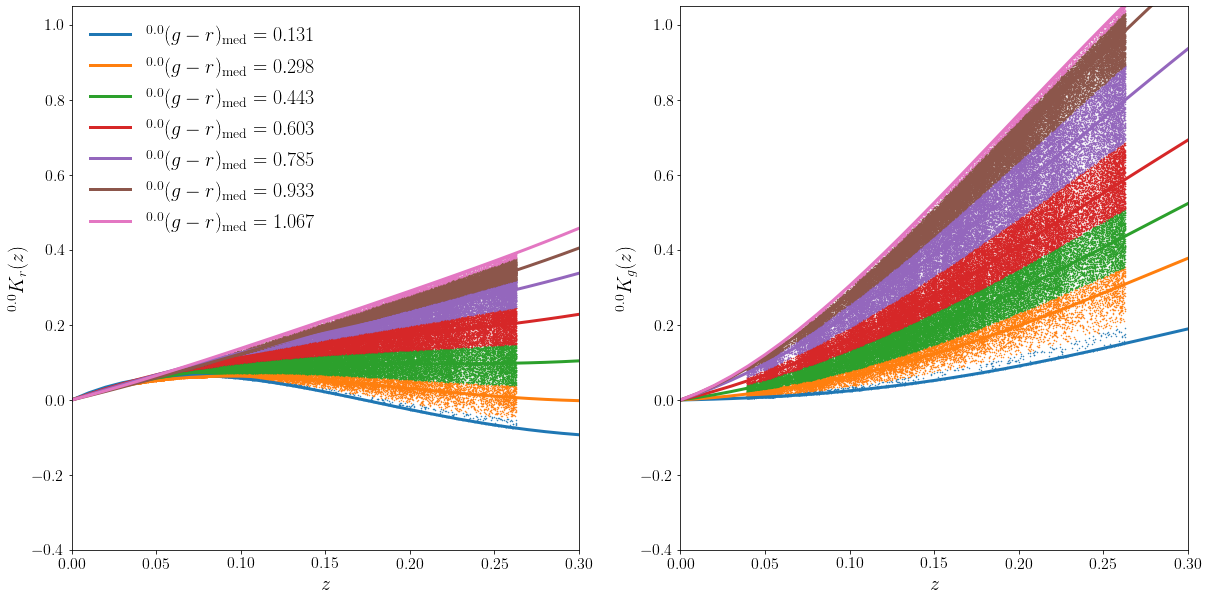

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)

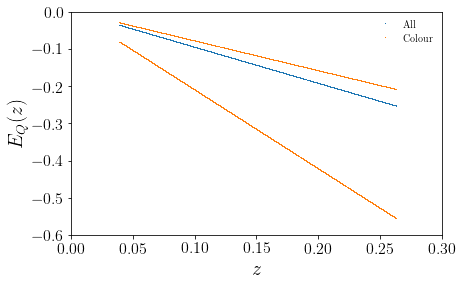

In [61]:
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Colour')

pl.xlabel(r'$z$')
pl.ylabel(r'$E_Q(z)$')

pl.xlim(0.0,0.3)
pl.ylim(-0.6, 0.0)

pl.legend(frameon=False)

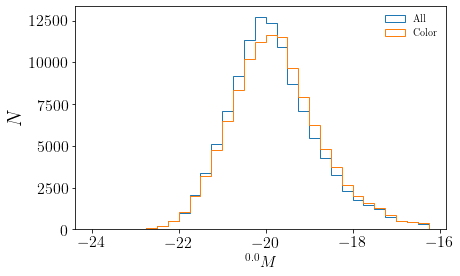

In [62]:
_ = pl.hist(gama_kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(gama_kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)
pl.ylabel('$N$')

pl.legend(frameon=False)

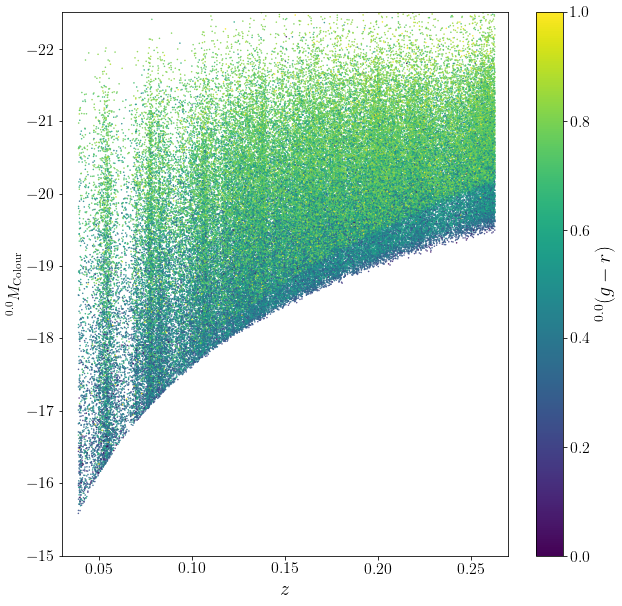

In [64]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

pl.sca(ax)

plt.scatter(gama_kE['ZGAMA'], gama_kE['MCOLOR_0P0'], c=gama_kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$z$')
plt.ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)

plt.colorbar(label = r'$^{0.0}(g-r)$')

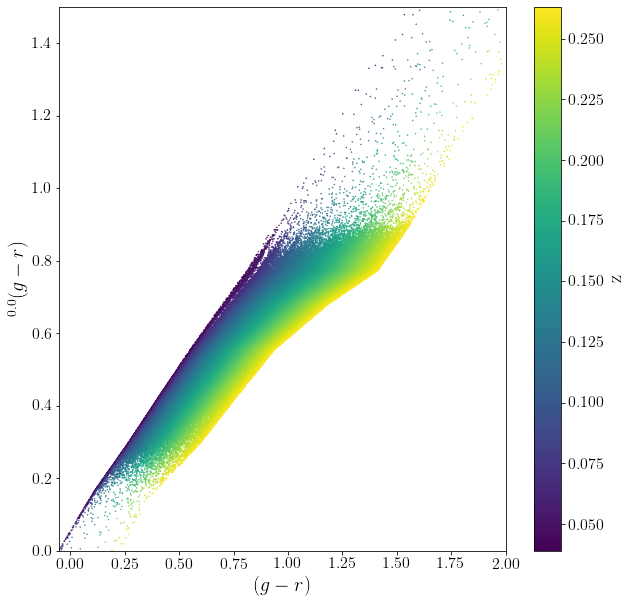

In [66]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['GMR'], gama_kE['REST_GMR_0P0'], c=gama_kE['ZGAMA'], s=0.25)
plt.xlabel(r'$(g-r)$')
plt.ylabel(r'$^{0.0}(g-r)$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='z')

# Done.